# CS661A Term Project
## Group 7


In [1]:
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np  # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
import plotly.graph_objects as go
from bokeh.plotting import figure
import dash
from dash import dcc
from dash import html
from folium.plugins import MarkerCluster, Search, MeasureControl, Fullscreen
sns.set_style("darkgrid")


In [2]:
# Load the weather data from the CSV file
weather_df = pd.read_csv('./data/combined.csv')


In [3]:
weather_df.shape  # (2558333, 14)


(2558333, 14)

In [4]:
weather_df.head()

,date,inme,regi,prov,wsnm,lat,lon,elvt,prcp,stp,temp,hmdy,wdct,wdsp
0,2000-05-07,A001,CO,DF,BRASILIA,-15.789444,-47.925833,1159.54,0.0,886.758333,25.125000,48.416667,129.083333,1.766667
1,2000-05-08,A001,CO,DF,BRASILIA,-15.789444,-47.925833,1159.54,0.0,888.062500,22.104167,60.500000,117.000000,2.066667
2,2000-05-09,A001,CO,DF,BRASILIA,-15.789444,-47.925833,1159.54,0.0,888.083333,22.041667,58.791667,157.500000,1.150000
3,2000-05-10,A001,CO,DF,BRASILIA,-15.789444,-47.925833,1159.54,0.0,888.962500,22.462500,61.750000,159.291667,2.008333
4,2000-05-11,A001,CO,DF,BRASILIA,-15.789444,-47.925833,1159.54,0.0,888.495833,21.329167,62.416667,146.083333,2.670833


In [5]:
weather_df.columns

Index(['date', 'inme', 'regi', 'prov', 'wsnm', 'lat', 'lon', 'elvt', 'prcp',
       'stp', 'temp', 'hmdy', 'wdct', 'wdsp'],
      dtype='object')

### Info On Some Columns
| abbr | Full Form |
|-|-|
| date | Observation Date |
| inme | Station number (INMET number) for the location |
| regi | Region |
| prov | Provision |
| wsnm | Weather station name |
| lat | Latitude |
| lon | Longitude |
| elvt | Elevation |
| prcp | Precipitation (milimetres) |
| stp | Instant Air Atmospheric Pressure (millibars) |
| temp | Instant Air Temperature (celsius degrees) |
| hmdy | Relative Humidity of Air (%) |
| wdct | Wind Direction (radius degrees) |
| wdsp | Instant Wind Speed (metres per second) |


In [6]:
# check for NaN values
# weather_df.isnull().values.any()
weather_df.isnull().sum()


date      0
inme      0
regi      0
prov      0
wsnm      0
lat       0
lon       0
elvt      0
prcp    106
stp     106
temp    107
hmdy    107
wdct    230
wdsp    230
dtype: int64

In [7]:
weather_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558333 entries, 0 to 2558332
Data columns (total 14 columns):
 #   Column  Dtype  
---  ------  -----  
 0   date    object 
 1   inme    object 
 2   regi    object 
 3   prov    object 
 4   wsnm    object 
 5   lat     float64
 6   lon     float64
 7   elvt    float64
 8   prcp    float64
 9   stp     float64
 10  temp    float64
 11  hmdy    float64
 12  wdct    float64
 13  wdsp    float64
dtypes: float64(9), object(5)
memory usage: 273.3+ MB


In [8]:
weather_df.describe()


,lat,lon,elvt,prcp,stp,temp,hmdy,wdct,wdsp
count,2.558333e+06,2.558333e+06,2.558333e+06,2.558227e+06,2.558227e+06,2.558226e+06,2.558226e+06,2.558103e+06,2.558103e+06
mean,-1.598692e+01,-4.783475e+01,4.177003e+02,1.560097e-01,9.667132e+02,2.364240e+01,7.143740e+01,1.544442e+02,2.050978e+00
std,8.197923e+00,7.028429e+00,3.480171e+02,4.700694e-01,3.751633e+01,4.403711e+00,1.467167e+01,5.737081e+01,1.318222e+00
min,-8.400000e+01,-7.949417e+01,1.000000e-01,0.000000e+00,7.464000e+02,-5.037692e+01,7.000000e+00,1.000000e+00,0.000000e+00
25%,-2.235806e+01,-5.252472e+01,1.160000e+02,0.000000e+00,9.427875e+02,2.140833e+01,6.316667e+01,1.130833e+02,1.166667e+00
50%,-1.638917e+01,-4.796639e+01,3.620000e+02,0.000000e+00,9.720792e+02,2.448333e+01,7.420833e+01,1.486667e+02,1.804167e+00
75%,-9.286111e+00,-4.238917e+01,6.370000e+02,5.866667e-02,9.982500e+02,2.660417e+01,8.225000e+01,1.901667e+02,2.687500e+00
max,3.813611e+00,-2.931667e+01,2.450000e+03,5.540000e+01,1.050000e+03,4.490000e+01,1.000000e+02,3.600000e+02,2.332500e+01


In [9]:
for col in weather_df.columns:
    print(col, ":", weather_df[col].unique())


date : ['2000-05-07' '2000-05-08' '2000-05-09' ... '2021-04-28' '2021-04-29'
 '2021-04-30']
inme : ['A001' 'A002' 'A003' 'A005' 'A009' 'A010' 'A011' 'A012' 'A013' 'A014'
 'A015' 'A016' 'A017' 'A018' 'A019' 'A020' 'A021' 'A022' 'A023' 'A024'
 'A025' 'A026' 'A027' 'A028' 'A029' 'A031' 'A032' 'A033' 'A034' 'A035'
 'A036' 'A037' 'A038' 'A039' 'A040' 'A041' 'A042' 'A043' 'A044' 'A045'
 'A046' 'A047' 'A048' 'A049' 'A050' 'A051' 'A052' 'A053' 'A054' 'A055'
 'A056' 'A101' 'A102' 'A104' 'A108' 'A109' 'A110' 'A111' 'A112' 'A113'
 'A117' 'A119' 'A120' 'A121' 'A122' 'A123' 'A124' 'A125' 'A126' 'A128'
 'A133' 'A134' 'A135' 'A136' 'A137' 'A138' 'A140' 'A144' 'A201' 'A202'
 'A203' 'A204' 'A205' 'A206' 'A207' 'A209' 'A210' 'A211' 'A212' 'A213'
 'A214' 'A215' 'A216' 'A217' 'A218' 'A219' 'A220' 'A221' 'A222' 'A223'
 'A224' 'A225' 'A226' 'A227' 'A228' 'A229' 'A230' 'A231' 'A232' 'A233'
 'A234' 'A235' 'A236' 'A237' 'A238' 'A239' 'A240' 'A241' 'A242' 'A244'
 'A246' 'A247' 'A248' 'A249' 'A250' 'A251' 'A252'

### Sample Data
#### Due to large data, lets work with sample data
#### Dataset is too big so lets import in a chunk and work with the smallest one at first


In [10]:
# Convert the 'date' column to datetime format
weather_df['date'] = pd.to_datetime(weather_df['date'])

# Sort the weather data by date
# weather_df = weather_df.sort_values(by='date')


# Take a sample of 5000 points from weather data
sample_df = weather_df.sample(5000, random_state=101)

# sample_df.set_index('date', inplace=True, drop=True)

sample_df.reset_index()

sample_df.shape


(5000, 14)

In [11]:
sample_df.isnull().sum()


date    0
inme    0
regi    0
prov    0
wsnm    0
lat     0
lon     0
elvt    0
prcp    0
stp     0
temp    0
hmdy    0
wdct    0
wdsp    0
dtype: int64

<Axes: >

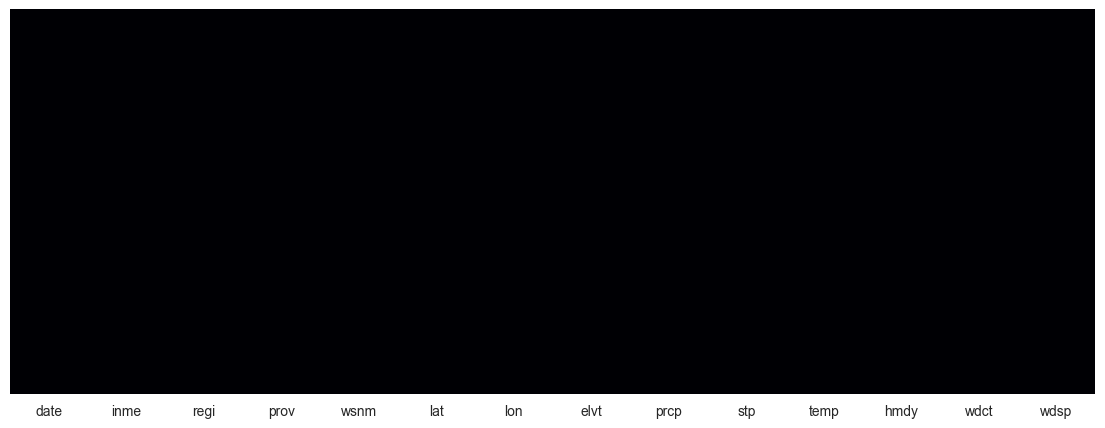

In [12]:
# Missing Data Visualization Using Heatmap
plt.figure(figsize=(14, 5))
sns.heatmap(weather_df.isnull(), cmap='magma', cbar=False, yticklabels=False)


In [13]:
sample_df.head()


,date,inme,regi,prov,wsnm,lat,lon,elvt,prcp,stp,temp,hmdy,wdct,wdsp
561981,2015-04-29,A305,NE,CE,FORTALEZA,-3.832222,-38.537778,26.45,0.291667,1008.208333,27.375000,77.250000,128.875000,2.375000
1613372,2017-02-16,A704,CO,MS,TRES LAGOAS,-20.790000,-51.712222,313.00,0.000000,978.366667,28.916667,57.250000,130.041667,1.591667
673295,2018-03-05,A325,NE,CE,QUIXERAMOBIM,-5.173056,-39.287222,232.00,0.025000,985.291667,27.104167,70.666667,77.875000,2.450000
2325154,2010-12-26,A899,S,RS,Santa Vitoria do Palmar - Barra do Chui,-33.741667,-53.371389,26.00,0.008333,1009.429167,22.554167,80.958333,145.750000,3.912500
328880,2021-02-24,A201,N,PA,BELEM,-1.411228,-48.439512,21.17,1.433333,1008.862500,25.604167,89.666667,134.708333,0.375000


### Questions To Explore
1. Data Share by Province
2. Avg air pressure by Province per year
3. Avg air pressure by City per year
4. Air pressure per city comparision
5. Where can u cook faster? Air pressure
6. Compare temperatures of different cities
7.  Days with most fluctuations like temp,wind
8. Temperature Change weekly,monthly or yearly
9. Seasonal Forecasting
10. Different Variables and their relation with each-other.like wind with humidity.
11. Gusty city of all time

In [14]:
air_df = sample_df[['date', 'regi', 'prov', 'temp', 'stp']]


In [15]:
# Average Minimum and Maximum Air pressure per prov per yr

air_pressure_min_max = air_df.pivot_table(columns=air_df.date, index='prov', values=[
                                          'temp', 'stp'], aggfunc='mean').stack()
air_pressure_min_max


stp       temp
prov date                             
AC   2010-03-04  992.292835  26.987500
     2010-04-29  980.569748  25.425336
     2010-07-16  992.001351  23.849885
     2010-11-21  993.882281  24.189396
     2010-12-07  994.117397  24.231835
...                     ...        ...
TO   2020-12-24  985.348133  25.592697
     2021-02-20  990.645455  26.500000
     2021-03-11  975.552174  25.656522
     2021-04-08  936.578838  31.819523
     2021-04-15  990.246140  30.355877

[4880 rows x 2 columns]

**Where can you cook faster?**

In [16]:
air_pressure_min_max[air_pressure_min_max.stp ==
                     air_pressure_min_max.stp.max()]


,,stp,temp
prov,date,,
SE,2019-10-27,1044.5,27.441667


In province 'Espírito Santo' we can pressure cook faster. *Air pressure can change the time of **pressure** cooking*

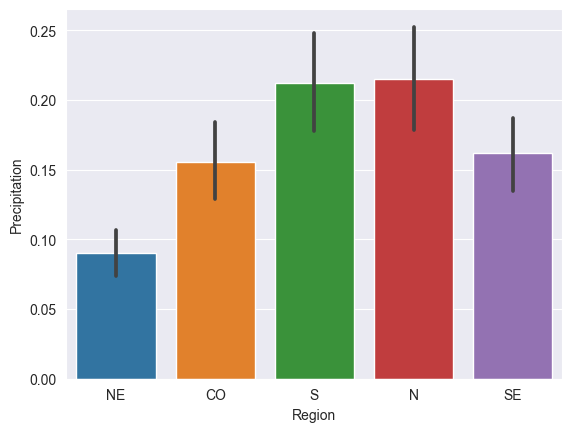

In [17]:
# Bar chart of average precipitation by region:
def create_bar_chart(data, x_axis, y_axis):
    ax = sns.barplot(x=x_axis, y=y_axis, data=data, estimator=np.mean)
    ax.set(xlabel='Region', ylabel='Precipitation')
    plt.show()


create_bar_chart(sample_df, "regi", "prcp")


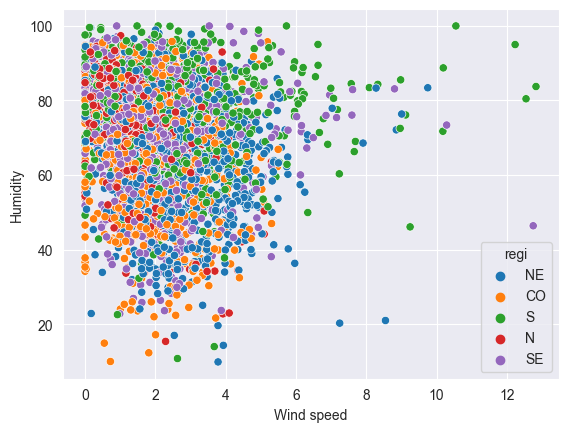

In [18]:
# Scatter plot of wind speed vs. humidity:
def create_scatterplot(data, x_axis, y_axis, hue_column):
    ax = sns.scatterplot(x=x_axis, y=y_axis, data=data, hue=hue_column)
    ax.set(xlabel='Wind speed', ylabel='Humidity')
    plt.show()


create_scatterplot(sample_df, "wdsp", "hmdy", "regi")


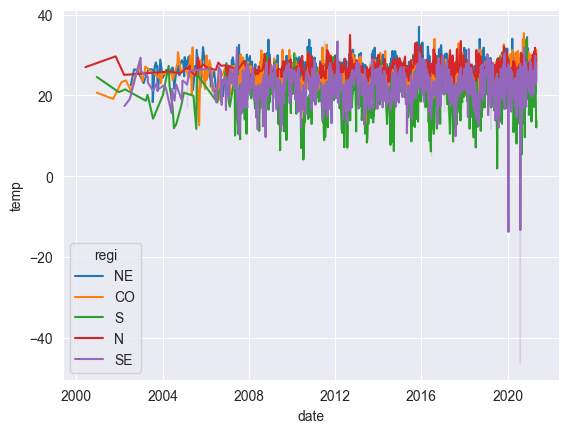

In [19]:
# Line graph of temperature over time by station:
def create_graph(data, x_axis, y_axis, hue_column):
    ax = sns.lineplot(x=x_axis, y=y_axis, data=data, hue=hue_column)
    ax.set(xlabel=x_axis, ylabel=y_axis)
    plt.show()


create_graph(sample_df, "date", "temp", "regi")


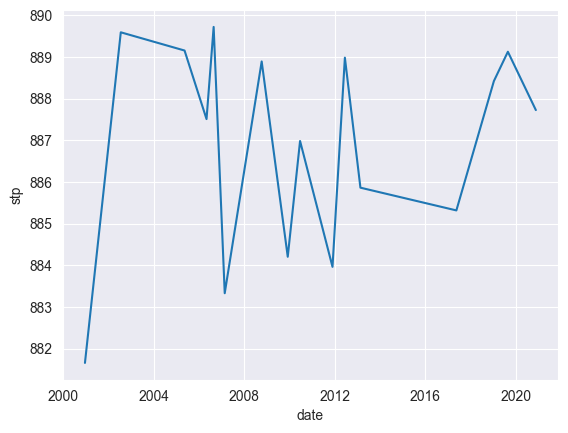

In [20]:
# Line graph of atmospheric pressure over time for station A001:
a001_data = sample_df.query("inme == 'A001'")

create_graph(a001_data, "date", "stp", None)


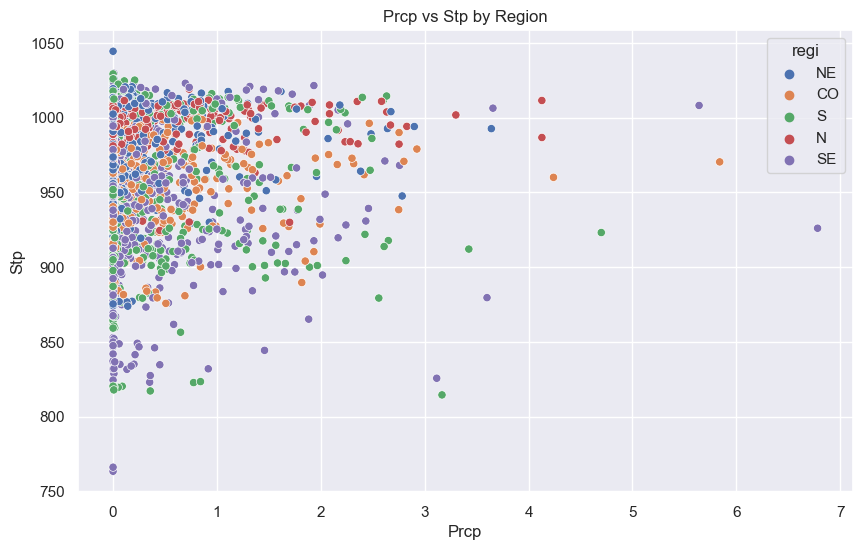

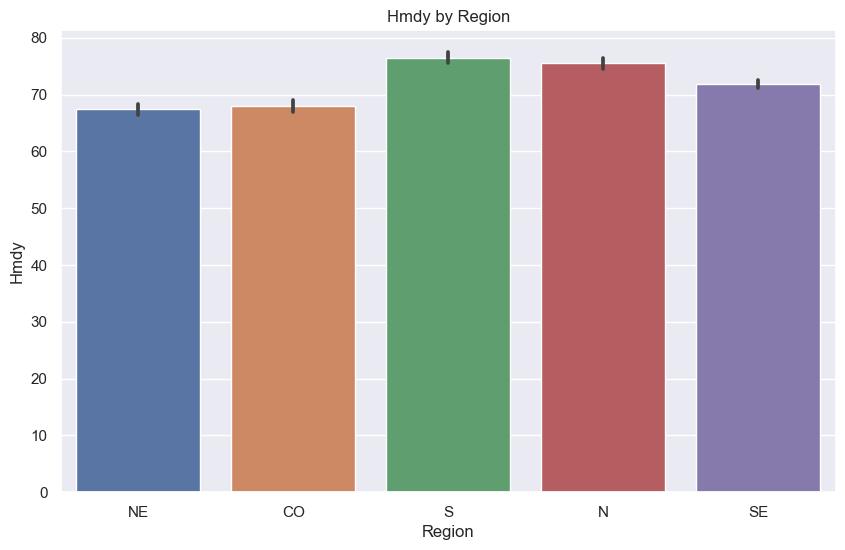

In [21]:
# Define a function to create a graph for a specific column
def create_graph(column_name):
    sns.set(style="darkgrid")
    plt.figure(figsize=(10, 6))
    sns.lineplot(x="date", y=column_name, hue="inme", data=sample_df)
    plt.title(column_name.capitalize() + " Over Time by Station")
    plt.xlabel("Date")
    plt.ylabel(column_name.capitalize())
    plt.show()

# Define a function to create a scatterplot for two columns


def create_scatterplot(x_column, y_column):
    sns.set(style="darkgrid")
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_column, y=y_column, hue="regi", data=sample_df)
    plt.title(x_column.capitalize() + " vs " +
              y_column.capitalize() + " by Region")
    plt.xlabel(x_column.capitalize())
    plt.ylabel(y_column.capitalize())
    plt.show()

# Define a function to create a bar chart for a specific column


def create_bar_chart(column_name):
    sns.set(style="darkgrid")
    plt.figure(figsize=(10, 6))
    sns.barplot(x="regi", y=column_name, data=sample_df)
    plt.title(column_name.capitalize() + " by Region")
    plt.xlabel("Region")
    plt.ylabel(column_name.capitalize())
    plt.show()


# Answer sample question 1: How has the temperature changed over time for station A001?
# create_graph("temp")

# # Answer sample question 2: Is there a correlation between precipitation and atmospheric pressure?
create_scatterplot("prcp", "stp")

# # Answer sample question 3: Which region had the highest average humidity in May 2000?
# weather_df["month"] = pd.DatetimeIndex(sample_df["date"]).month
# may_df = weather_df.loc[weather_df["month"] == 5]
create_bar_chart("hmdy")


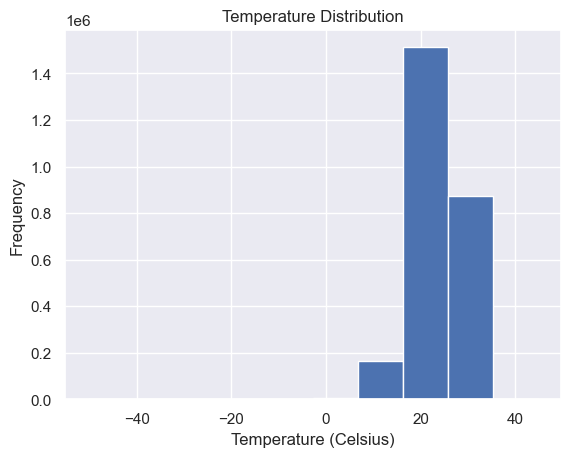

In [23]:
# Visualization : Histogram of temperature
plt.hist(weather_df['temp'])
plt.title('Temperature Distribution')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.show()


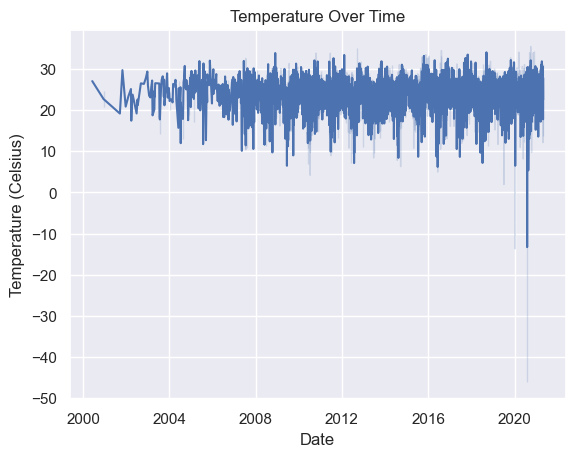

In [24]:
# Line plot of temperature over time
sns.lineplot(data=sample_df, x='date', y='temp')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.show()


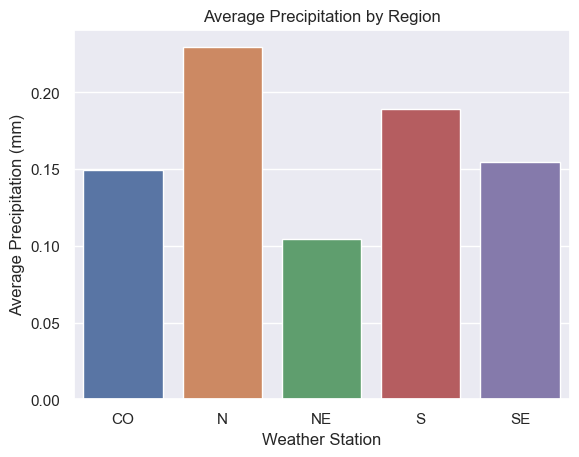

In [25]:
# Group weather data by region and calculate mean precipitation
region_precipitation = weather_df.groupby(
    'regi')['prcp'].mean().reset_index()

# Bar plot of average precipitation by region
sns.barplot(data=region_precipitation, x='regi', y='prcp')
plt.title('Average Precipitation by Region')
plt.xlabel('Weather Station')
plt.ylabel('Average Precipitation (mm)')
plt.show()


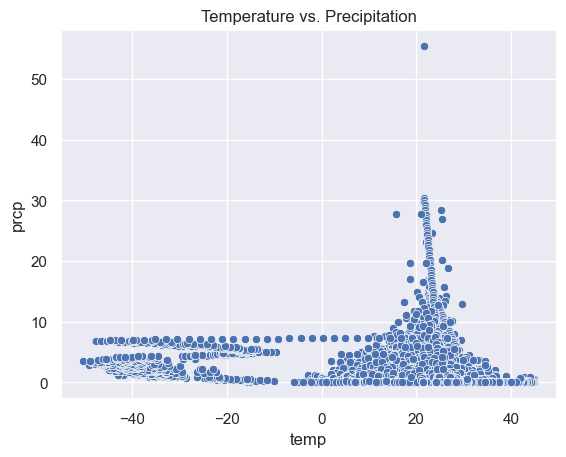

In [26]:
# Visualization : Scatter plot of temperature vs. precipitation
sns.scatterplot(data=weather_df, x='temp', y='prcp')
plt.title('Temperature vs. Precipitation')
plt.show()


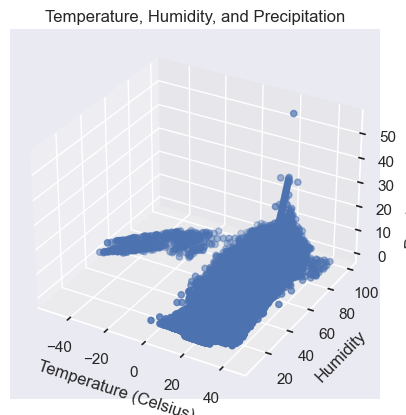

In [27]:
# Create a 3D scatter plot of temperature, humidity, and precipitation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(weather_df['temp'], weather_df['hmdy'], weather_df['prcp'])
ax.set_xlabel('Temperature (Celsius)')
ax.set_ylabel('Humidity')
ax.set_zlabel('Precipitation (mm)')
plt.title('Temperature, Humidity, and Precipitation')
plt.show()


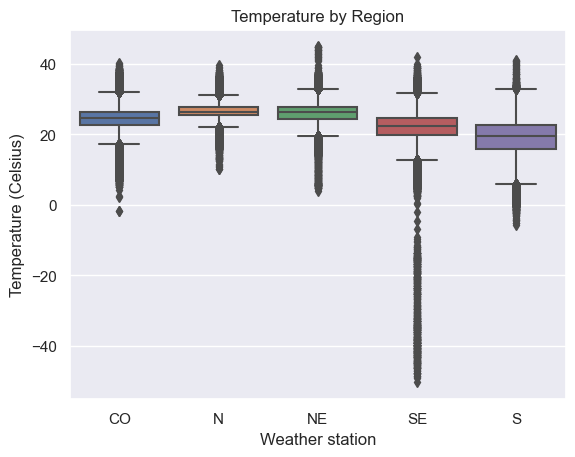

In [28]:
# Visualization: Box plot of temperature by region
sns.boxplot(data=weather_df, x='regi', y='temp')
plt.title('Temperature by Region')
plt.xlabel('Weather station')
plt.ylabel('Temperature (Celsius)')
plt.show()


In [ ]:
# # Convert the 'date' column to a datetime object and extract the month
# weather_df['month'] = pd.to_datetime(weather_df['date']).dt.month

In [31]:
weather_df['date'][0]

Timestamp('2000-05-07 00:00:00')

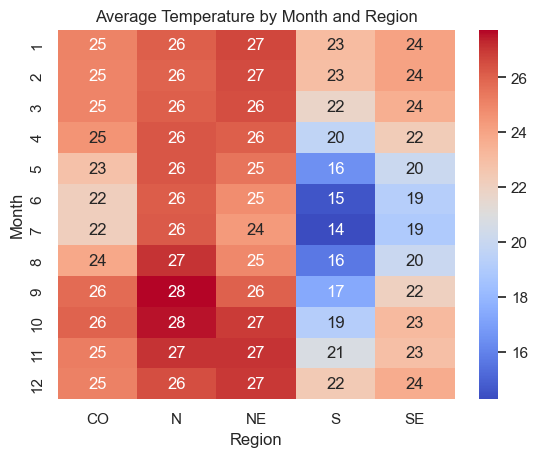

In [32]:
# Extract month from date column
weather_df['month'] = weather_df['date'].dt.month

# Group weather data by month and region and calculate mean temperature
month_region_temp = weather_df.groupby(['month', 'regi'])[
    'temp'].mean().reset_index()

# Pivot the data to create a heatmap
month_region_temp_pivot = month_region_temp.pivot(
    index='month', columns='regi', values='temp')

# Heatmap of average temperature by month and region
sns.heatmap(month_region_temp_pivot, cmap='coolwarm', annot=True)
plt.title('Average Temperature by Month and Region')
plt.xlabel('Region')
plt.ylabel('Month')
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6288\2844287786.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = weather_df.corr()


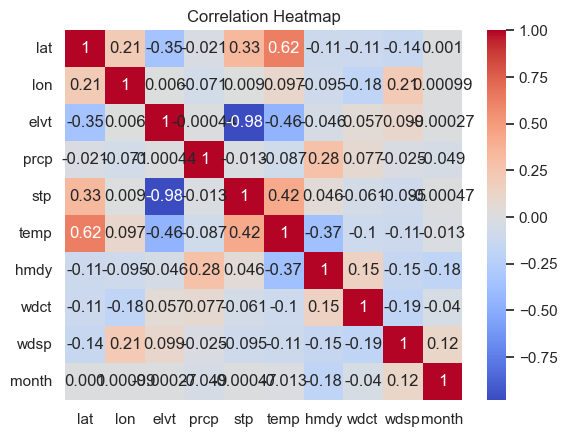

In [35]:
# Visualization : Heatmap of correlation between weather variables
corr_matrix = weather_df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()


In [36]:
# Create an interactive scatter plot of temperature vs. humidity with tooltip information (station name and region)
fig = px.scatter(sample_df, x='hmdy', y='temp',
                 color='regi', hover_name='inme')

# Customize the plot
fig.update_layout(title='Temperature vs. Humidity',
                  xaxis_title='Humidity',
                  yaxis_title='Temperature (Celsius)',
                  hovermode='closest')

# Display the plot
fig.show()


### Interactive map of weather stations with pop-up markers showing station name, elevation, and temperature:

In [37]:
# Create a map centered on Brazil
brazil_map = folium.Map(location=[-15.788497, -47.879873], zoom_start=4)

# Create a MarkerCluster object
marker_cluster = MarkerCluster(name='Weather Stations')


# Add markers for weather stations with pop-up information to the MarkerCluster object
for i, row in sample_df.iterrows():
    popup_text = f"Weather Station: {row['wsnm']} ({row['inme']})<br>Temperature: {round(row['temp'], 4)} &#8451;<br>Elevation: {row['elvt']} m"
    folium.Marker(location=[row['lat'], row['lon']],
                  popup=folium.Popup(popup_text, max_width=500),
                  icon=folium.Icon(color='red')).add_to(marker_cluster)

# Add the MarkerCluster object to the map
brazil_map.add_child(marker_cluster)


# Create a list of all weather station names
station_names = list(set(weather_df['wsnm']))

# Create a list of all weather stations
stations = weather_df[['wsnm', 'inme', 'lat', 'lon']
                      ].drop_duplicates().values.tolist()

# Define a custom search function that filters results based on user input


def search_func(query, item):
    # Return True if the query matches the start of the item name
    return query.lower() in item['wsnm'].lower()


# Add a search bar to the map
search = Search(
    layer=marker_cluster,
    geom_type='Point',
    search_data=stations,  # Add the search data
    search_func=search_func,  # Add the custom search function
    placeholder='Search for a location',
    collapsed=False,
    search_label='wsnm',
    search_zoom=200,  # Increase search_zoom to show all markers on the map
    weight=3,
    show=True,
    tooltip=True,
    marker=True,
    custom_icon=None,
    highlight=True,
    data=sample_df[['lat', 'lon', 'wsnm']],
    position='topright').add_to(brazil_map)

# Add all weather station names to the search bar options
search.options = station_names


# Get the highest and coldest weather stations
max_temp_info = sample_df.loc[sample_df['temp'].idxmax()]
min_temp_info = sample_df.loc[sample_df['temp'].idxmin()]
max_temp = round(max_temp_info['temp'], 2)
min_temp = round(min_temp_info['temp'], 2)


# Create a list of locations for the HeatMap
locations = sample_df[['lat', 'lon']].values.tolist()

# Create a HeatMap object
heatmap = folium.plugins.HeatMap(locations, min_opacity=0.2, radius=15)

# Add the HeatMap object to the map
brazil_map.add_child(heatmap)

# Create a MeasureControl object
measure_control = MeasureControl(
    position='topleft', primary_length_unit='kilometers', secondary_length_unit='miles')

# Add the MeasureControl object to the map
brazil_map.add_child(measure_control)

# Create a LayerControl object
layer_control = folium.LayerControl()

# Add the LayerControl object to the map
brazil_map.add_child(layer_control)

# Define the HTML for the legend
legend_html = '''
<div style="position: fixed; bottom: 30px; left: 30px; width: 200px; height: 160px;
            border: 2px solid grey; z-index: 9999; font-size: 12px;
            background-color: rgba(255, 255, 255, 0.7);">
    <h4 style="text-align:center; margin-top:15px;">Legend</h4>
    <hr>
    <table style="display: flex; flex-wrap: wrap; justify-content: space-evenly; padding: 5px;">
      <tr>
        <td>Minimum Temperature: {min_temp} &#8451;</td>
      </tr>
      <tr>
        <td>Maximum Temperature: {max_temp} &#8451;</td>
      </tr>
    </table>
  </div>
<div style="position: fixed; bottom: 30px; right: 30px; width: 200px; height: 160px;
            border: 2px solid grey; z-index: 9999; font-size: 16px;
            background-color: rgba(255, 255, 255, 0.7);">
    <h4 style="text-align:center; margin-top:15px;">Markers</h4>
    <hr>
    <table style="display: flex; flex-wrap: wrap; justify-content: space-evenly; padding: 5px;">
      <tr>
        <td><img src="https://raw.githubusercontent.com/pointhi/leaflet-color-markers/master/img/marker-icon-red.png"
            style="width:20px;height:30px;"></td>
        <td>Weather Station</td>
      </tr>
      
      <tr>
        <td><i class="fa-solid fa-circle"></i></td>
        <td>Station Clusters</td>
      </tr>
    </table>
  </div>
'''.format(min_temp=min_temp, max_temp=max_temp)

# Add the HTML to the map
brazil_map.get_root().html.add_child(folium.Element(legend_html))

# Create a Fullscreen object
fullscreen = Fullscreen(position='topright',
                        title='Fullscreen', title_cancel='Exit fullscreen')

# Add the Fullscreen object to the map
brazil_map.add_child(fullscreen)

# Add a satellite layer to the map
folium.TileLayer('Stamen Terrain').add_to(brazil_map)

# Save the map as an HTML file
brazil_map.save('brazil_map.html')


In [ ]:
# # Get a list of all the weather station ids
# all_ids = list(sample_df['inme'].unique())

# # Save the list of ids to a JavaScript file
# with open('weather_station_ids.js', 'w') as f:
#     f.write(f"var station_ids = {all_ids};")


In [46]:
# Define the interactive dashboard using Plotly Dash
app = dash.Dash(__name__)

# # Define the layout of the dashboard
# app.layout = html.Div([
#     html.H1("Weather Data Analysis Dashboard"),
#     html.Div([
#         html.H3("Heat Map of Temperature and Precipitation by Region"),
#         dcc.Graph(
#             id="heatmap",
#             figure=px.scatter_mapbox(
#                 sample_df,
#                 lat="lat",
#                 lon="lon",
#                 color="temp",
#                 size="prcp",
#                 zoom=3,
#                 mapbox_style="open-street-map"
#             )
#         )
#     ]),
#     html.Div([
#         html.H3("Line Chart of Historical Weather Patterns by Station"),
#         dcc.Dropdown(
#             id="station-selector",
#             options=[{"label": s, "value": s}
#                      for s in sample_df["wsnm"].unique()],
#             value=sample_df["wsnm"].unique()[0]
#         ),
#         dcc.Graph(
#             id="line-chart"
#         )
#     ]),
#     html.Div([
#         html.H3("Scatter Plot of Correlation Between Weather Variables"),
#         dcc.Dropdown(
#             id="variable-selector",
#             options=[{"label": v, "value": v}
#                      for v in sample_df.columns[8:]],
#             value=sample_df.columns[8]
#         ),
#         dcc.Graph(
#             id="scatter-plot"
#         )
#     ]),
#     html.Div([
#         html.Label("Year Slider"),
#         dcc.RangeSlider(
#             id="year-slider",
#             min=sample_df["date"].dt.year.min(),
#             max=sample_df["date"].dt.year.max(),
#             value=[sample_df["date"].dt.year.min(
#             ), sample_df["date"].dt.year.max()],
#             marks={str(year): str(year)
#                    for year in sample_df["date"].dt.year.unique()},
#             step=None
#         )
#     ])
# ])

# # Define the callbacks that update the plots based on user input


# @app.callback(
#     dash.dependencies.Output("line-chart", "figure"),
#     [dash.dependencies.Input("station-selector", "value")]
# )
# def update_line_chart(station):
#     filtered_df = sample_df[sample_df["wsnm"] == station]
#     fig = go.Figure()
#     fig.add_trace(go.Scatter(
#         x=filtered_df["date"], y=filtered_df["temp"], mode="lines", name="Temperature"))
#     fig.add_trace(go.Scatter(
#         x=filtered_df["date"], y=filtered_df["prcp"], mode="lines", name="Precipitation"))
#     fig.update_layout(title_text=f"Historical Weather Patterns for {station}")
#     return fig

##############################################################################################################################

# app.layout = html.Div([
#     html.H1("Weather Data Visualization"),
#     dcc.Dropdown(
#         id="field-dropdown",
#         options=[{"label": col, "value": col} for col in weather_df.columns],
#         value="temp"
#     ),
#     dcc.Graph(id="field-graph")
# ])

# # Define the callback function that updates the graph based on the selected field


# @app.callback(
#     dash.dependencies.Output("field-graph", "figure"),
#     [dash.dependencies.Input("field-dropdown", "value")]
# )
# def update_graph(field):
#     fig = go.Figure()
#     fig.add_trace(go.Scatter(
#         x=weather_df["date"],
#         y=weather_df[field],
#         mode="lines",
#         name=field
#     ))
#     fig.update_layout(
#         title=field.capitalize() + " over Time",
#         xaxis_title="Date",
#         yaxis_title=field.capitalize(),
#         template="plotly_white"
#     )
#     return fig
##############################################################################################################################

# Define the layout of the app
app.layout = html.Div([
    html.H1('Weather Data Dashboard'),
    dcc.Graph(id='scatter-plot'),
    html.Label('Select a region:'),
    dcc.Dropdown(
        id='region-dropdown',
        options=[{'label': r, 'value': r}
                 for r in weather_df['wsnm'].unique()],
        value=weather_df['wsnm'].unique()[0]
    ),
    html.Label('Select a variable to plot:'),
    dcc.RadioItems(
        id='variable-radio',
        options=[
            {'label': 'Temperature', 'value': 'temperature'},
            {'label': 'Humidity', 'value': 'humidity'},
            {'label': 'Precipitation', 'value': 'precipitation'}
        ],
        value='temp'
    ),
    html.Br(),
    html.Label('Select a date range:'),
    dcc.RangeSlider(
        id='date-slider',
        min=weather_df['date'].min().year,
        max=weather_df['date'].max().year,
        step=None,
        marks={str(year): str(year)
               for year in weather_df['date'].dt.year.unique()},
        value=[weather_df['date'].min().year, weather_df['date'].max().year]
    )
])


# Define the callback functions for the app
@app.callback(
    dash.dependencies.Output('scatter-plot', 'figure'),
    [dash.dependencies.Input('region-dropdown', 'value'),
     dash.dependencies.Input('variable-radio', 'value'),
     dash.dependencies.Input('date-slider', 'value')])
def update_scatter_plot(wsnm, date_range):
    # Filter the data based on the user inputs
    filtered_data = weather_data[(weather_df['wsnm'] == wsnm) &
                                 (weather_df['date'].dt.year >= date_range[0]) &
                                 (weather_df['date'].dt.year <= date_range[1])]
    # Create the scatter plot
    fig = px.scatter(filtered_data, x='lat', y='lon')
    return fig


# Start the Dash app
if __name__ == "__main__":
    app.run_server(debug=True, use_reloader=False)


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: on
